In [8]:
import numpy as np

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

In [1]:
from sklearn.datasets import load_diabetes
x, y = load_diabetes( return_X_y=True)



In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=4)

In [18]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [20]:
y_pred  = lr.predict(x_test)

In [21]:
from sklearn.metrics import r2_score , mean_squared_error

In [22]:
r2_score(y_test , y_pred )

0.4610988992842088

In [23]:
mean_squared_error(y_test , y_pred)

2939.358188394143

In [26]:
from sklearn.linear_model import Ridge
r = Ridge(alpha = 0.0001) # alpha is the lamda or the hyperparameter 

In [28]:
r.fit(x_train, y_train)

Ridge(alpha=0.0001)

In [29]:
y_pred = r.predict(x_test)

In [30]:
r2_score(y_test , y_pred )

0.46126293546449026

In [31]:
mean_squared_error(y_test , y_pred)

2938.4634767502757

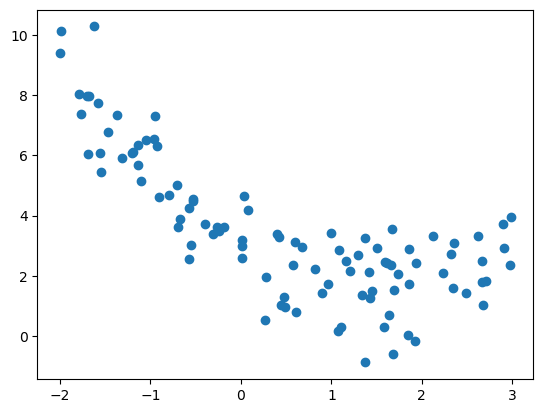

In [33]:
m = 100
x1 = 5*np.random.rand(m,1) -2
x2 = 0.7 *x1 ** 2-2*x1+3+np.random.randn(m, 1)

plt.scatter (x1, x2)
plt.show()

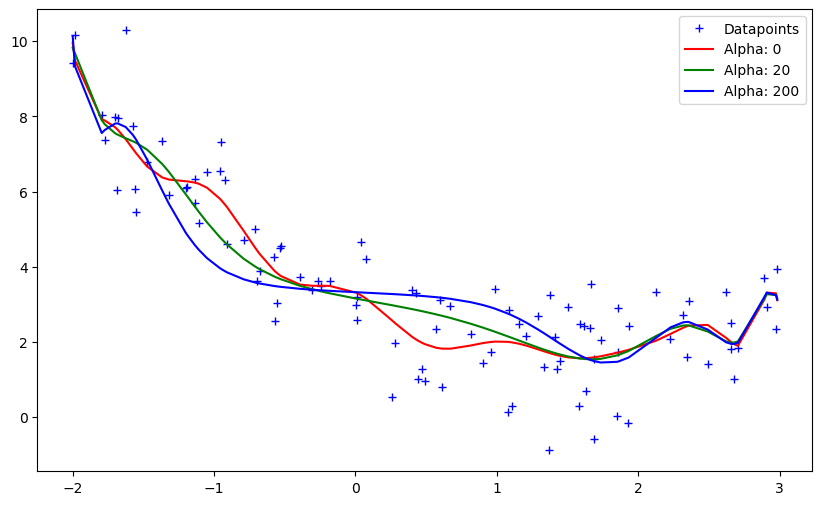

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def get_preds_ridge(x1, x2, alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=16)),
        ('ridge', Ridge(alpha=alpha))
    ])
    model.fit(x1, x2)
    return model.predict(x1)

alphas = [0, 20, 200]
cs = ['r', 'g', 'b']

plt.figure(figsize=(10, 6))
plt.plot(x1, x2, 'b+', label='Datapoints')

for alpha, c in zip(alphas, cs):
    preds = get_preds_ridge(x1, x2, alpha)
    # Plot
    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()
